# 1. Testing Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


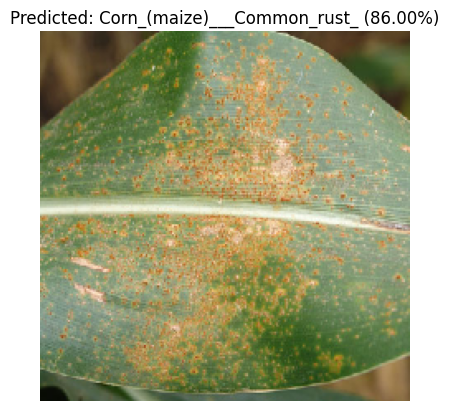

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt

# Define parameters
img_width, img_height = 224, 224
model_path = r"C:\Users\AMAN KUMAR\Downloads\MPDDIV4\MobileNetV1 Model\mobnet_fine_tuned_model.keras"
test_image_path = r"C:\Users\AMAN KUMAR\Downloads\MPDDIV4\MobileNetV1 Model\Internet_Test_Image\Corn-cr.jpg"  # Update with the path to your test image

# Manually define the class labels
class_labels = {
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    5: 'Corn_(maize)___Common_rust_',
    6: 'Corn_(maize)___Northern_Leaf_Blight',
    7: 'Corn_(maize)___healthy',
    8: 'Grape___Black_rot',
    9: 'Grape___Esca_(Black_Measles)',
    10: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    11: 'Grape___healthy',
    12: 'Potato___Early_blight',
    13: 'Potato___Late_blight',
    14: 'Potato___healthy',
    15: 'Tomato___Early_blight',
    16: 'Tomato___Late_blight',
    17: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    18: 'Tomato___healthy'
}

# Load the saved model
model = load_model(model_path)

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(img_width, img_height))  # Load the image and resize
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess for MobileNet

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get the index of the highest probability
predicted_probability = np.max(predictions)  # Get the highest probability
predicted_label = class_labels[predicted_class]  # Map index to class label

# Display the result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_label} ({predicted_probability:.2%})")
plt.show()
